In [7]:
import nltk
import scipy.stats as ss #check rank of a word in a document
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [8]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\NEW\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [9]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [10]:
bible = gutenberg.words('bible-kjv.txt')
bible

['[', 'The', 'King', 'James', 'Bible', ']', 'The', ...]

In [11]:
type(bible)

nltk.corpus.reader.util.StreamBackedCorpusView

In [12]:
bible_words = list(map(str.lower,bible))

In [13]:
words_set = set(bible_words)
word_count = [(word, bible_words.count(word)) for word in words_set]
word_count[:10]

[('conducted', 2),
 ('inclosed', 8),
 ('shaking', 8),
 ('perpetually', 3),
 ('shibmah', 1),
 ('free', 59),
 ('162', 1),
 ('nymphas', 1),
 ('godliness', 15),
 ('misery', 7)]

In [14]:
#sorting the term-occurrence relation
word_rank = ss.rankdata([w_count for (word,w_count) in word_count])
word_ranked = [(w_count[0], w_count[1], word) for w_count, word in zip(word_count, word_rank)]
count_sorted = sorted(word_ranked, key=lambda x:x[2])

Histogram showing the frequencies of the first 50 terms in the document


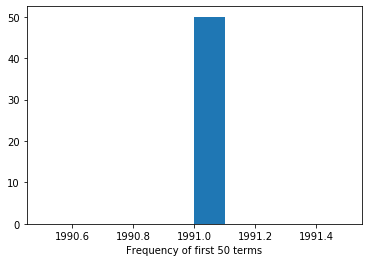

In [15]:

freq_array = [word_rank[2] for word_rank in count_sorted[0:50]]
#histogram for frequency of the first 50 terms
plt.xlabel('Frequency of first 50 terms')
plt.hist(freq_array, bins=10)
print('Histogram showing the frequencies of the first 50 terms in the document')
plt.show()

In [32]:
def symbol_removal(word):
    #removes all additional symbols and special characters from the string
    #to return a plain text word
    return re.sub('[^A-Za-z0-9\s]+', '', word).lower()

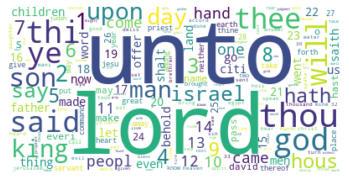

In [36]:
stopwords = set(STOPWORDS)
freq_list = {}
for word, count in word_count:
    if word not in stopwords: 
        word = symbol_removal(word)
        if word:
            word = porter.stem(word)
            freq_list[word] = freq_list.get(word, 0) + count

word_cloud = WordCloud(background_color='white')
word_cloud.generate_from_frequencies(freq_list)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

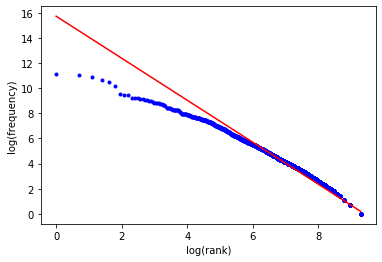

slope of the line: -1.67 and corpus constant of line: 15.72


In [26]:
#zipf's law
L = len(count_sorted)
X = np.array([np.log(L-rank+1) for (word, count, rank) in count_sorted])
Y = np.array([np.log(count) for (word, count, rank) in count_sorted])
plt.plot(X, Y, 'b.')
A = np.vstack([X, np.ones(L)]).T
slope, cc = np.linalg.lstsq(A, Y, rcond=None)[0]
plt.plot(X, slope*X + cc, 'r')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()
print(f'slope of the line: {round(slope, 2)} and corpus constant of line: {round(cc, 2)}')